In [ ]:
from astroML.datasets import fetch_dr7_quasar
import astropy
import numpy as np
astropy.cosmology.Planck18
import matplotlib.pyplot as plt
import random as rd
from scipy import integrate

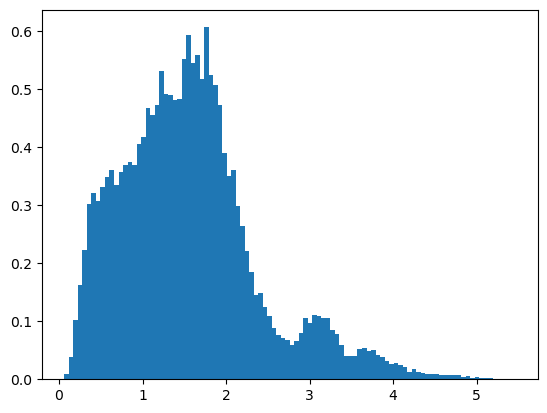

In [26]:
quasar = fetch_dr7_quasar()
#quasar = quasar[:10000]
z = quasar['redshift']
BIN = 100
data = plt.hist(z, bins=BIN, density=True)
y = data[0][:]
x = data[1][1:]
plt.show()

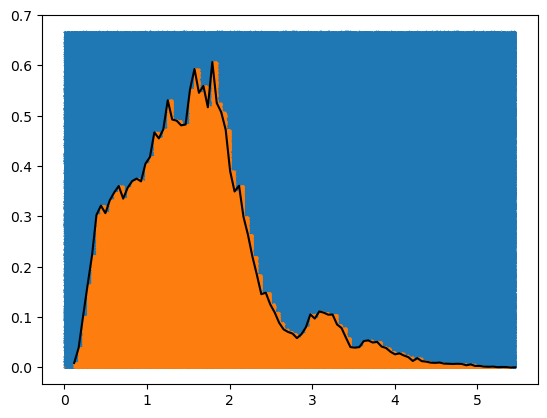

In [27]:
#REJECTION

N=1000000
XX = np.zeros((1, 1))
YY = np.zeros((1, 1))

xg = np.random.uniform(0,max(x),N)
yg = np.random.uniform(0,1.1*max(y),N)
all = np.vstack((xg, yg))

for i in range(0,BIN-1):
    kek = all[:, (all[:][0]>=x[i]) & (all[:][0]<x[i+1]) & (all[:][1]<=y[i])]
    XX = np.append(XX, [kek[:][0]], axis=1)
    YY = np.append(YY, [kek[:][1]], axis=1)

plt.scatter(xg, yg, s=0.1)
plt.scatter(XX[0], YY[0], s=0.1)
plt.plot(x, y, 'k')
plt.show()

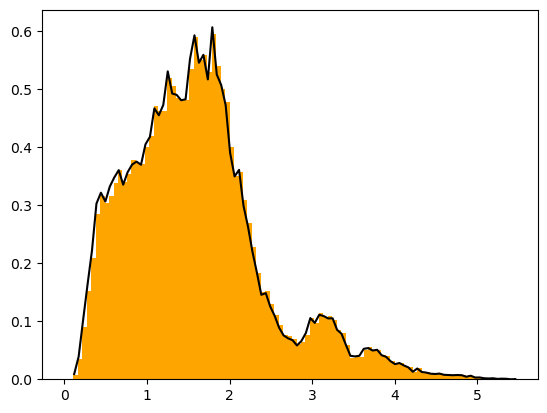

In [28]:
plt.hist(XX[0], bins=100, color='orange', density=True)
plt.plot(x, y, 'k')
plt.show()

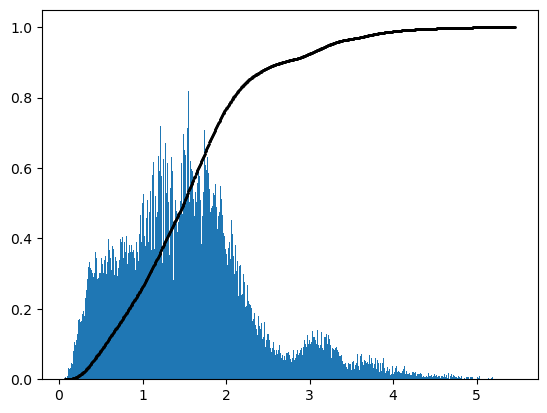

In [29]:
#INVERSION
datta = plt.hist(z, bins=1000, density=True)
inter = integrate.cumulative_trapezoid(datta[0][:], datta[1][1:])
xint = datta[1][1:-1]
plt.scatter(xint, inter, s=1, color='k')
plt.show()

polpo = 100000
generator = np.random.uniform(inter[0],inter[-1],polpo)
tantidati = np.array(())

for i in range(0,polpo):
    ppp1 = inter[inter<=generator[i]][-1]
    ppp2 = inter[inter>generator[i]][0]
    tonno = np.where(inter == ppp1)[0][0]
    tantidati = np.append(tantidati, (xint[tonno] + (xint[tonno+1]-xint[tonno])*(generator[i]-ppp1)/(ppp2-ppp1)))


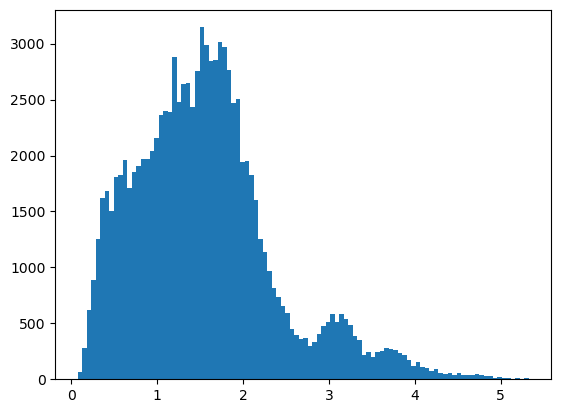

In [30]:
plt.hist(tantidati, bins=100)
plt.show()
    